In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv").drop("Unnamed: 0", axis=1)

In [3]:
df.head()[
    ["type_clean", "title", "director_filled", "cast_filled", "country_filled", "month_added", "netflix_age", "age", "rating_filled", \
     "dur", "genre", "desc"]
]

,type_clean,title,director_filled,cast_filled,country_filled,month_added,netflix_age,age,rating_filled,dur,genre,desc
0,movie,Dick Johnson Is Dead,kirsten johnson,unknown,united states,september,1,2,pg-13,90,documentaries,"as her father nears the end of his life, filmm..."
1,tv show,Blood & Water,unknown,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,september,1,1,tv-ma,2,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t..."
2,tv show,Ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",unknown,september,1,1,tv-ma,1,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...
3,tv show,Jailbirds New Orleans,unknown,unknown,unknown,september,1,1,tv-ma,1,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo..."
4,tv show,Kota Factory,unknown,"mayur more, jitendra kumar, ranjan raj, alam k...",india,september,1,1,tv-ma,2,"international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...


## Aim

Want to create a function that filters the data based on the specified parameters then predicts the number of movies/tv shows that fit those parameters in the future

Example:

- We specify that we are interested in movies from the United States
- The data is filtered so that we work only with movies from the United States
- We train a regression model to predict the number of movies from the United States that will be added to Netflix in the coming years
- We plot a line graph showing the historic data and our projection

## The Filter

In [4]:
def data_filter(data, conditions):
    for k in conditions.keys():
        data = data[data[k] == conditions[k]]
    return data

In [5]:
data_filter(df, {"type_clean": "movie", "country_filled": "united states"})

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,dates_filled,month_added,year_added,netflix_age,release_year_filled,age,rating_filled,dur,genre,desc
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,"September 25, 2021",september,2021,1,2020,2,pg-13,90,documentaries,"as her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,"September 24, 2021",september,2021,1,2021,1,pg-13,104,"comedies, dramas",a woman adjusting to life after a loss contend...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,...,"September 20, 2021",september,2021,1,2010,12,pg-13,103,comedies,mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,...,"September 19, 2021",september,2021,1,2013,9,pg-13,97,"horror movies, sci-fi & fantasy",a family’s idyllic suburban life shatters when...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,...,"September 16, 2021",september,2021,1,1975,47,pg,124,"action & adventure, classic movies, dramas",when an insatiable great white shark terrorize...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,...,"November 20, 2019",november,2019,3,2011,11,r,94,"comedies, dramas, independent movies",when a divorced writer gets a letter from an o...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,...,"November 20, 2019",november,2019,3,2005,17,pg,88,"children & family movies, comedies",when a father of eight and a mother of 10 prep...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,...,"November 20, 2019",november,2019,3,2007,15,r,158,"cult movies, dramas, thrillers","a political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,"November 1, 2019",november,2019,3,2009,13,r,88,"comedies, horror movies",looking to survive in a world taken over by zo...


We can have as many conditions as we like

In [6]:
data_filter(df, {"type_clean": "tv show", "country_filled": "japan", "rating_filled": "tv-14", "month_added": "january"})

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,dates_filled,month_added,year_added,netflix_age,release_year_filled,age,rating_filled,dur,genre,desc
1385,s1386,TV Show,Demon Slayer: Kimetsu no Yaiba,NaN,"Natsuki Hanae, Akari Kito, Hiro Shimono, Yoshi...",Japan,"January 22, 2021",2019,TV-14,1 Season,...,"January 22, 2021",january,2021,1,2019,3,tv-14,1,"anime series, international tv shows",after a demon attack leaves his family slain a...
2977,s2978,TV Show,Ainori Love Wagon: African Journey,NaN,"Becky, Ryo Kato, Karina Maruyama, Kohei Takeda",Japan,"January 30, 2020",2019,TV-14,1 Season,...,"January 30, 2020",january,2020,2,2019,3,tv-14,1,"international tv shows, reality tv, romantic t...","to find love, seven strangers leave japan and ..."
2998,s2999,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14,2 Seasons,...,"January 23, 2020",january,2020,2,2020,2,tv-14,2,"anime series, international tv shows",seiya and the knights of the zodiac rise again...
3020,s3021,TV Show,Soul Eater,NaN,"Chiaki Omigawa, Laura Bailey, Emiri Kato, Kouk...",Japan,"January 16, 2020",2008,TV-14,1 Season,...,"January 16, 2020",january,2020,2,2008,14,tv-14,1,"anime series, international tv shows",maka and the other students at the death weapo...
5077,s5078,TV Show,Godzilla,"Kobun Shizuno, Hiroyuki Seshita","Mamoru Miyano, Takahiro Sakurai, Kana Hanazawa...",Japan,"January 17, 2018",2017,TV-14,1 Season,...,"January 17, 2018",january,2018,4,2017,5,tv-14,1,tv shows,a desperate group of refugees attempts to reco...
5095,s5096,TV Show,Fullmetal Alchemist,NaN,"Romi Park, Rie Kugimiya, Megumi Toyoguchi, Miy...",Japan,"January 1, 2018",2003,TV-14,1 Season,...,"January 1, 2018",january,2018,4,2003,19,tv-14,1,"anime series, international tv shows",brothers edward and alphonse use alchemy to re...
5096,s5097,TV Show,Fullmetal Alchemist: Brotherhood,Yasuhiro Irie,"Romi Park, Rie Kugimiya, Megumi Takamoto, Shin...",Japan,"January 1, 2018",2010,TV-14,5 Seasons,...,"January 1, 2018",january,2018,4,2010,12,tv-14,5,"anime series, international tv shows",after both suffer physical damage – brothers e...
6426,s6427,TV Show,Case Closed,NaN,"Minami Takayama, Alison Retzloff, Wakana Yamaz...",Japan,"January 4, 2019",2015,TV-14,1 Season,...,"January 4, 2019",january,2019,3,2015,7,tv-14,1,"anime series, crime tv shows, tv thrillers","turned into a young boy by a sinister potion, ..."
7906,s7907,TV Show,Rurouni Kenshin,NaN,"Mayo Suzukaze, Miki Fujitani, Miina Tominaga, ...",Japan,"January 1, 2020",1998,TV-14,3 Seasons,...,"January 1, 2020",january,2020,2,1998,24,tv-14,3,"anime series, international tv shows",a nomadic swordsman arrives at a martial arts ...


## The Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
def model(data, conditions, years_to_predict):
    df_model = data_filter(data, conditions)["netflix_age"]
    X = np.arange(1, df_model.values.max() + 1)
    y = np.array([df_model.value_counts()[i] if i in df_model.values else 0 for i in X])
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    lm = LinearRegression()
    lm.fit(X_train.reshape(-1, 1), y_train)
    plt.plot(2022 - X, y)
    plt.plot(years_to_predict, lm.predict((2022 - years_to_predict).reshape(-1, 1)))
    plt.show()

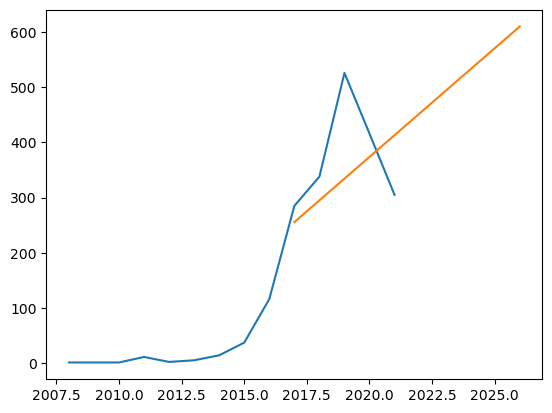

In [9]:
model(df, {"type_clean": "movie", "country_filled": "united states"}, np.arange(2017, 2027))

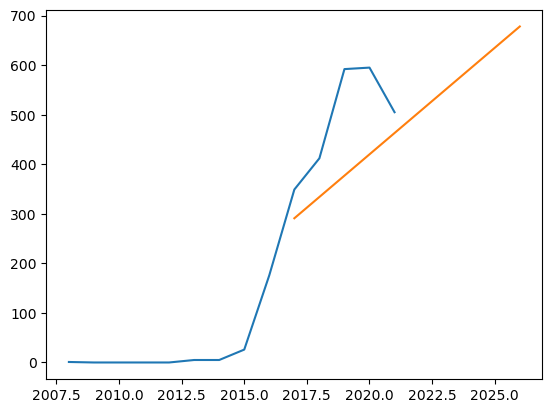

In [10]:
model(df, {"type_clean": "tv show"}, np.arange(2017, 2027))

In [11]:
!jupyter nbconvert --to html ml.ipynb

[NbConvertApp] Converting notebook ml.ipynb to html
[NbConvertApp] Writing 657067 bytes to ml.html
